# Effect of different factors on borrower APR

  ##                           by Shady Mohammed Hussein
  
## Investigation overview:

### Our main purpose here is to investigate some variables that affect the APR of an individual.

###        Preliminary Exploration:

- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Shady Mohammed\Downloads\prosperLoanData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

First of all, we want to have an overlook at our data set.


### I believe the Income Range and Debt to income Ratio are going to be very useful here.


In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [6]:
#Here we filter our data choosing only the factors that we believe are related the most to Borrower APR.
df2 =df.drop(df.columns[[0,1,2,3,4,5,6,78,79,64,65,66,67,68,69,70,71,72,73,74,75,76,77,50,51,52,53,54,55,56\
                         ,57,58,59,60,61,62,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39\
                        ,40,41,42,43,44,45]],axis=1)

Here we want to have a look at the data we have regarding types and null values 

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BorrowerAPR                113912 non-null  float64
 1   BorrowerRate               113937 non-null  float64
 2   LenderYield                113937 non-null  float64
 3   EstimatedEffectiveYield    84853 non-null   float64
 4   EstimatedLoss              84853 non-null   float64
 5   EstimatedReturn            84853 non-null   float64
 6   ProsperRating (numeric)    84853 non-null   float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  EmploymentStatusDuration   10

In [8]:
df2.head()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,Investors
0,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,0.17,"$25,000-49,999",True,3083.333333,9425,258
1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,0.18,"$50,000-74,999",True,6125.000000,10000,1
2,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,0.06,Not displayed,True,2083.333333,3001,41
3,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",True,2875.000000,10000,158
4,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,0.26,"$100,000+",True,9583.333333,15000,20


After looking at the missing observations, I decided to drop the NaN values as we can't substitute 30,000+ observations with the ean or median as this would be misleading, also we still have more than 70,000 observations that can describe ourdata accurately, so we sacrificed size for accuracy without really sacrificing size.

In [9]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BorrowerAPR                76216 non-null  float64
 1   BorrowerRate               76216 non-null  float64
 2   LenderYield                76216 non-null  float64
 3   EstimatedEffectiveYield    76216 non-null  float64
 4   EstimatedLoss              76216 non-null  float64
 5   EstimatedReturn            76216 non-null  float64
 6   ProsperRating (numeric)    76216 non-null  float64
 7   ProsperRating (Alpha)      76216 non-null  object 
 8   ProsperScore               76216 non-null  float64
 9   ListingCategory (numeric)  76216 non-null  int64  
 10  BorrowerState              76216 non-null  object 
 11  Occupation                 76216 non-null  object 
 12  EmploymentStatus           76216 non-null  object 
 13  EmploymentStatusDuration   76216 non-null  fl

### First: Univariate Analysis:

## Distribution of Borrower APR

- We can see here the distribution is a multimodal one values ranging from 0.04 to 0.42 and a mean of 0.22.

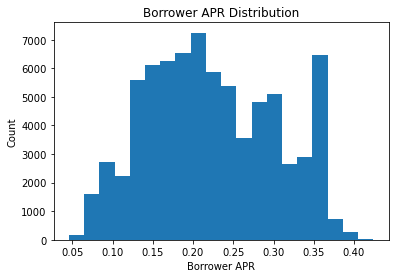

In [38]:
#Looking at our main variable the Borrower's Annual Percentage Rate
plt.hist(df2.BorrowerAPR,bins=20)
plt.ylabel('Count')
plt.xlabel('Borrower APR')
plt.title('Borrower APR Distribution');

We can see that the distribution is normal especially if we decrease the bin sizes it will appear even better but I have chosen this size for clarity, the mean should be at around 0.22 slightly dragged towards the right edge of the mid area because of the high density at 0.36.

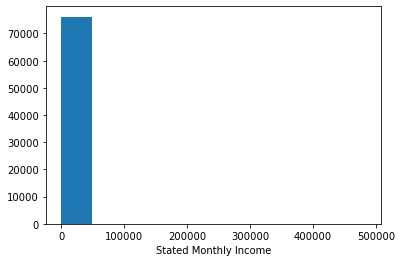

In [11]:
#Here we explore the distribution of the Stated Monthly Income 

plt.hist(data=df2,x='StatedMonthlyIncome')
plt.xlabel('Stated Monthly Income');


There are Obviously some outliers so let's have a look at the statistics of the data.

In [12]:
# Here we can havea broader look at the outliers compared to the rest of the data statistically
df2.describe()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,0.223901,0.193621,0.183616,0.166738,0.078611,0.095528,4.132413,6.080246,3.302259,104.578028,0.258032,6002.833586,9294.999410,69.998517
std,0.079372,0.074088,0.074088,0.067595,0.046047,0.030031,1.661460,2.360640,4.396670,95.836443,0.320587,5110.743506,6413.404265,97.801415
min,0.045830,0.040000,0.030000,-0.181600,0.004900,-0.181600,1.000000,1.000000,0.000000,0.000000,0.000000,0.250000,1000.000000,1.000000
25%,0.161570,0.134900,0.124900,0.114800,0.042000,0.074080,3.000000,4.000000,1.000000,32.000000,0.150000,3583.333333,4000.000000,1.000000
50%,0.215660,0.184500,0.174500,0.157670,0.069900,0.091100,4.000000,6.000000,1.000000,76.000000,0.220000,5041.666667,8000.000000,32.000000
75%,0.287800,0.254900,0.244900,0.219000,0.108000,0.115000,5.000000,8.000000,3.000000,150.000000,0.320000,7250.000000,14603.250000,100.000000
max,0.423950,0.360000,0.340000,0.319900,0.366000,0.266700,7.000000,11.000000,20.000000,755.000000,10.010000,483333.333333,35000.000000,1189.000000


As we saw earlier, we do have some outliers and -ve values that tend to drag the graph to right as the max reported income is 48000, while our mean is approx. 6000.

(0.0, 15000.0)

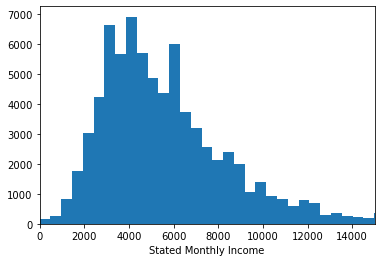

In [13]:
plt.hist(data=df2,x='StatedMonthlyIncome',bins=1000)
plt.xlabel('Stated Monthly Income');
plt.xlim(0,15000)

We can see here that the distribution of reported monthly incomes is normal around the range 0 t0 9000 but with a long tail for values bigger than that, so the distribution is considered to be right skewed which has been caused by many individual who have reported incomes way higher than average incomes (Typically higher than mean * 1.6 ).

I thought about changing the bins to be of logarithmic but given the outliers and the spread of the distribution I gave that thought up.

D:\Programs\AnacondaPython\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


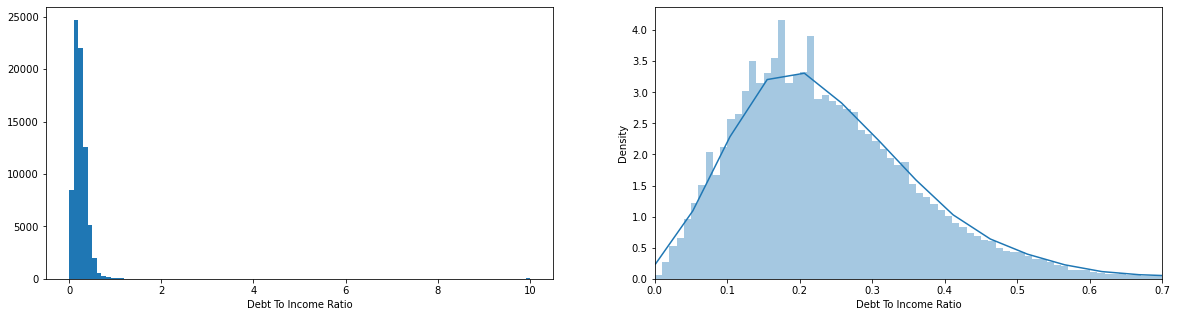

In [14]:
#Let's now look at the debt to income ratio, we need to trim it also as we have max value of 10 but an average of 0.26

plt.figure(figsize= [20,5])

plt.subplot(1,2,1)
plt.hist(x=df2.DebtToIncomeRatio,bins=100)
plt.xlabel("Debt To Income Ratio");

plt.subplot(1,2,2)
sns.distplot(x=df2.DebtToIncomeRatio,kde=True,bins=1000)
plt.xlim(0,0.7)
plt.xlabel("Debt To Income Ratio");

we used seaborn side to side with matplotlib to show the effect of changing bin sizes and trimming the graph and it's definitely more informative that way.

## Distribution of Income Ranges:

- We can see here that the highest demand on loans comes from those who earn 50k to 75k USD, and the lowest is for those who are not employed, they tend not to take loans.

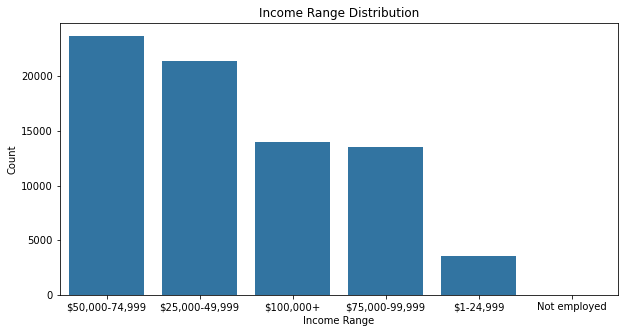

In [15]:
#Now let's look at the distribution of the occupations
fig,ax =plt.subplots(figsize=(10,5))
sns.countplot(x=df2.IncomeRange,color= sns.color_palette()[0])
#plt.xticks(rotation=15)
plt.title('Income Range Distribution')
plt.ylabel('Count')
plt.xlabel("Income Range");

The individuals who tend to go for loans the most are those who earn between 50k and 75k, let's see their Prosper Scores for more data that can help our investigation.

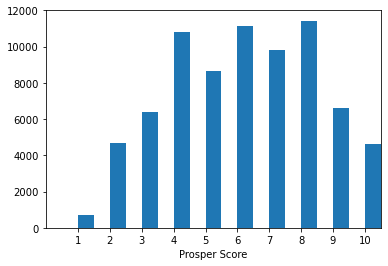

In [16]:
#Now let's look at the Prosper Score distribution
bins= np.arange(0,df2.ProsperScore.max()+2,1)-0.5
plt.hist(x=df2.ProsperScore,bins=20)
plt.xticks(range(1,11))
plt.xlim(0,10.5)
plt.xlabel("Prosper Score");


Here we dive deep into the distribution of Prosper Scores, it's a discrete distribution as we can't have decimal scores and it's also looking free of skewness.

We have now the distribution of the Prosper Scores, we have noticed that there are scores that are higher than 10, specifically 11, so we adjusted the graph to be truncated at 10 max and will deal with the rogue scores now.

In [17]:
df2.query('ProsperScore>10')

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,Investors
9,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,0.25,"$25,000-49,999",True,3333.333333,10000,1
158,0.09469,0.0809,0.0709,0.06919,0.0199,0.04929,7.0,AA,11.0,6,OR,Tradesman - Mechanic,Employed,22.0,0.05,"$75,000-99,999",True,6666.666667,5500,1
224,0.13799,0.1099,0.0999,0.09628,0.0324,0.06388,6.0,A,11.0,1,WI,Sales - Commission,Employed,114.0,0.11,"$100,000+",True,33333.333333,30000,1
236,0.06726,0.0605,0.0505,0.05001,0.0074,0.04261,7.0,AA,11.0,1,OR,Tradesman - Mechanic,Employed,105.0,0.14,"$25,000-49,999",True,4083.333333,9000,198
277,0.15868,0.1355,0.1255,0.11932,0.0474,0.07192,5.0,B,11.0,1,MA,Other,Full-time,154.0,0.19,"$75,000-99,999",True,6833.333333,20000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113762,0.13636,0.1139,0.1039,0.09989,0.0349,0.06499,6.0,A,11.0,20,NY,Other,Employed,41.0,0.23,"$100,000+",True,9083.333333,25000,149
113784,0.12691,0.0990,0.0890,0.08643,0.0249,0.06153,6.0,A,11.0,1,CA,Other,Employed,158.0,0.30,"$100,000+",True,8583.333333,15000,1
113855,0.14751,0.1189,0.1089,0.10446,0.0374,0.06706,6.0,A,11.0,3,NY,Food Service Management,Full-time,89.0,0.07,"$75,000-99,999",True,6666.666667,8500,143
113881,0.19681,0.1730,0.1630,0.15264,0.0674,0.08524,4.0,C,11.0,7,CO,Professional,Employed,37.0,0.29,"$75,000-99,999",True,8166.666667,19432,1


We see here about 1400 in accurate observations, I have decided to replace them with the mode to not affect our data set.

In [18]:
df2.ProsperScore = df2.ProsperScore.replace([11.0],8.0)

In [19]:
df2.ProsperScore.value_counts()

8.0     12824
6.0     11156
4.0     10826
7.0      9816
5.0      8643
9.0      6588
3.0      6374
2.0      4674
10.0     4600
1.0       715
Name: ProsperScore, dtype: int64

* We have dealt with some factors that we believe affect the the Borrower APR, within the process we looked at some of the outliers that are still necessary to have for our analysis, we have just adjusted our scales and limits to get the zoom in we want. Also, we have cleaned and tidied the data during the process. We want to further explore them in the next secion.

- We need to look now at the relationship between each of the above variables and the Borrower APR our variable of interest.

### Second: Bivariate Analysis:

First of all we want to have a look at mutual correlations between our variables,but we need to drop unnecessary columns for this section.

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BorrowerAPR                76216 non-null  float64
 1   BorrowerRate               76216 non-null  float64
 2   LenderYield                76216 non-null  float64
 3   EstimatedEffectiveYield    76216 non-null  float64
 4   EstimatedLoss              76216 non-null  float64
 5   EstimatedReturn            76216 non-null  float64
 6   ProsperRating (numeric)    76216 non-null  float64
 7   ProsperRating (Alpha)      76216 non-null  object 
 8   ProsperScore               76216 non-null  float64
 9   ListingCategory (numeric)  76216 non-null  int64  
 10  BorrowerState              76216 non-null  object 
 11  Occupation                 76216 non-null  object 
 12  EmploymentStatus           76216 non-null  object 
 13  EmploymentStatusDuration   76216 non-null  fl

In [21]:
# we are studying bivariate relationships here so we need to drop unnecessary columns to get better results
df3 = df2.drop(df2.columns[[1,2,3,4,5,6,7,9,10,11,12,13,16,18,19]],axis=1)
df3.head()

,BorrowerAPR,ProsperScore,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
1,0.12016,7.0,0.18,"$50,000-74,999",6125.000000
3,0.12528,9.0,0.15,"$25,000-49,999",2875.000000
4,0.24614,4.0,0.26,"$100,000+",9583.333333
5,0.15425,10.0,0.36,"$100,000+",8333.333333
6,0.31032,2.0,0.27,"$25,000-49,999",2083.333333


''

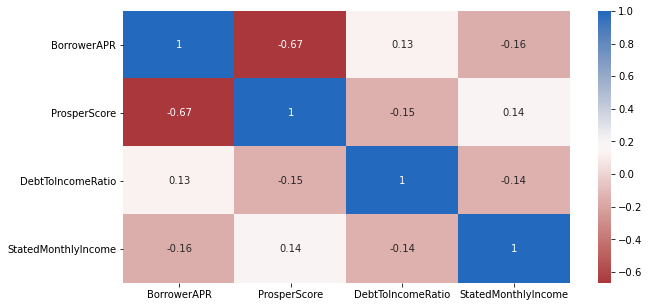

In [22]:
plt.figure(figsize=[10,5])
sns.heatmap(df3.corr(),annot=True,cmap='vlag_r')
;

We can notice here that the relationships to Borrower APR are weak except for the relationship with Prospect score, it appears to a moderate negative relatioship.

In [23]:
df4 = df3.query('DebtToIncomeRatio <=0.7')

The above step is to show us clarified results and remove the noise caused by the outliers in the Debt to Income Ratio data. While I believe they shouldn't be removed, I also believe in cutting them off for the sake of relation clarification.

Next step is to see these correlations graphically and visually to better investigate their effect on the main variable.

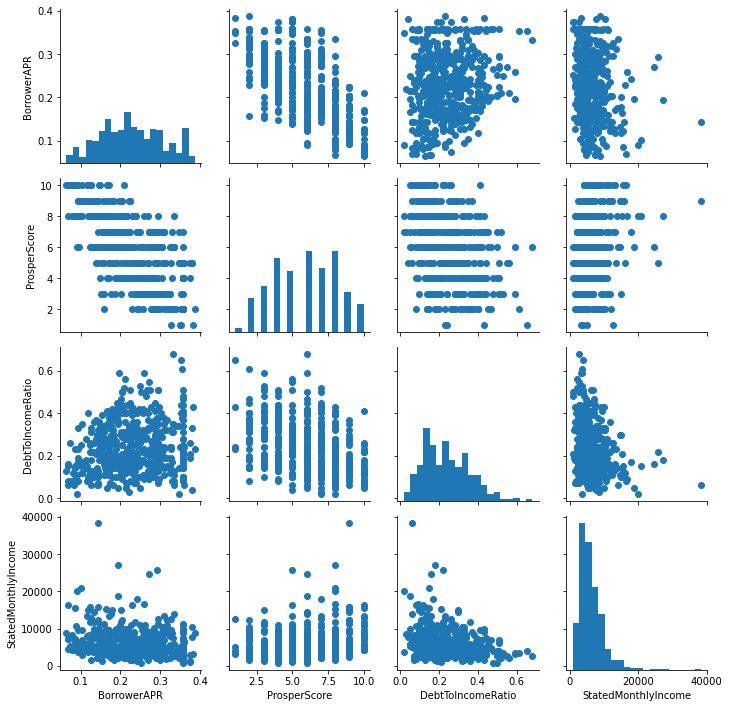

In [24]:
samples= np.random.choice(df4.shape[0],500,replace=False)
loan_samp = df4.iloc[samples]

n= sns.PairGrid(data=loan_samp)
n= n.map_diag(plt.hist,bins=20)
n.map_offdiag(plt.scatter);

We can see the mutual linear relationships between our chosen variables. The strongest relationship appears to be between the Borrower APR and Prosper Score unlike what we expected at the beginning of our investigation. However, the other relationships are not too small to be ignored amd still worth examining.

Let's Now have a closer look at the strongest correlation according to the investigation.

## Borrower APR by Prosper Score

- We can see that the highest APR rates are associated with the lowest Prosper scores, with gradual decrease in the APR rate as we approach the highest score of 10.

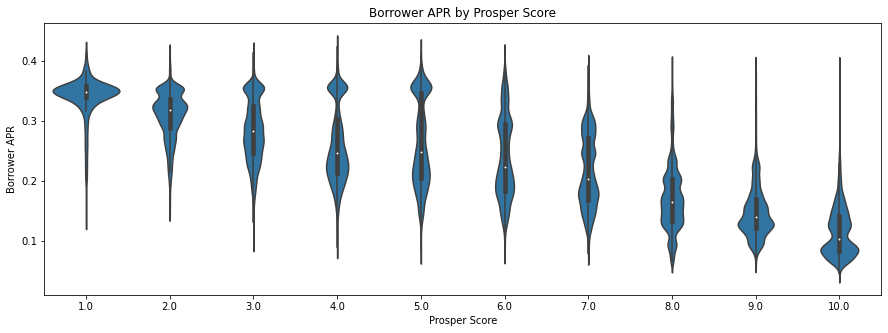

In [25]:
plt.figure(figsize=[15,5])
sns.violinplot(x= df3.ProsperScore,y=df3.BorrowerAPR,color=sns.color_palette()[0])
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.title('Borrower APR by Prosper Score');


Clearly now we see the negative correlation between the two variables and it approaches the strong limit of 0.7 (r= 0.67 here). Also, the violin plot allows us to see the outliers clearly.

''

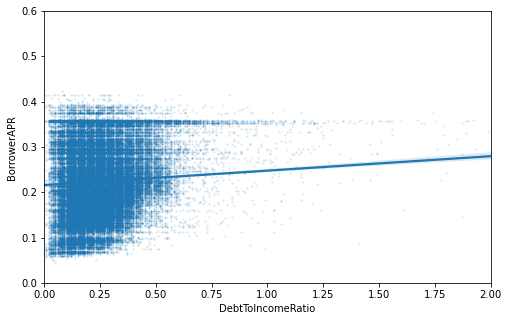

In [37]:
#We look now at the relationship between BorrowerAPR and Debt to income Ration more closely.
plt.figure(figsize=[8,5])
sns.regplot(x=df3.DebtToIncomeRatio,y=df3.BorrowerAPR,fit_reg=True,scatter_kws={'s':2,'alpha':0.1})
plt.xlim(0,2)
plt.ylim(0,0.6)
;

Here we can see an upward trend suggesting that there is a positive relationship between the  variables but as we saw before it's in the weak criteria as the regression line also suggests.

As we are starting to understand the effect of different factors on APR better and better, I am very curious to see the income categories that get the best APR.

## Borrower APR by Income Range

- The borrower APR rate also related with the income ranges as we can see that the lowest income categories tend to have the highest APR rates and the rates go down as we go higher in income range.

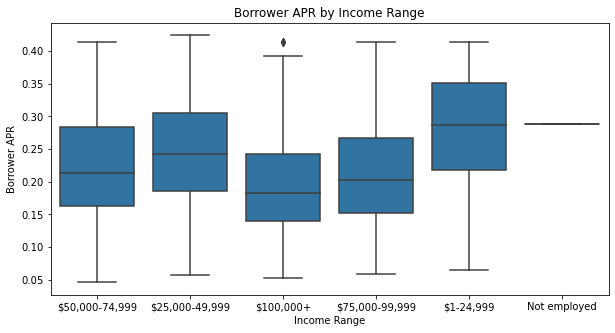

In [27]:
plt.figure(figsize=[10,5])
sns.boxplot(x=df3.IncomeRange,y=df3.BorrowerAPR,color=sns.color_palette()[0])
plt.xlabel('Income Range')
plt.ylabel('Borrower APR')
plt.title('Borrower APR by Income Range');

As expected, the lowest income category has the highest average APR while the highest income category has the lowest APR. Interesting.

We have now looked at some of the most interesting bivariate relationships we have, deduced some more information and undeerstood the relationships better. Time to move now to the Multivariate relationships analysis to understand the effect of mixing up variables on the APR we get.

### Third: Multivariate Analysis: 

I wonder what APR would people with high income and low Prosper Score get, our analysis has shown that the high income ranges and high high Prosper scores have the lowest APR so let's put that into a tough test.

## Borrower APR by Income Range and Prosper Score

- By exploring the multivariate relation between the 3 variables, we find a very interesting finding. When we have a Prosper score higher than 8, actually the lowest income category seem to have the lowest APR rates. Interesting !.

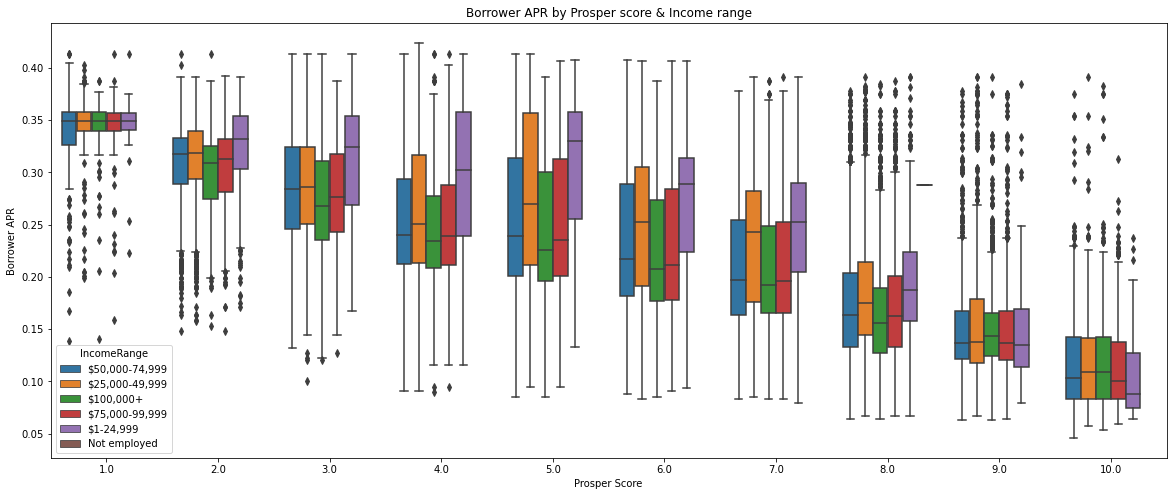

In [28]:
plt.figure(figsize=[20,8])
sns.boxplot(x=df3.ProsperScore,y=df3.BorrowerAPR,hue=df3.IncomeRange)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.title("Borrower APR by Prosper score & Income range");

We saw earlier that when people have high Prosper scores or High income renge they can get low APR, However, When the 2 factors contradict with each other, the Prosper score seems to be more important in determining the APR.

Another interesting finding that while the highest income category gets usually the lowest APR, it isn't true for Prosper scores > 8 as the category from  to 24,999 get the lowest APR upon having a prosper score of 9 or 10 !

- The multivariate analysis allowed us to see how the Borrower APR changes with changing both the Prosper score and the Income range. It has also allowed us to see micro scale of APR distribution across both variables

## Results:
- In Conclusion, we have deduced that people need to pay the greatest attention to their prosper score,as wehen it increases APR decreases.
- Another thing to consider is to have an higher income range if your score is 8 or lower, if your prosper score is 9 or 10 the best APR you will get is when your income is between 1 and 24,999 USD.
- Make sure to have a low Debt to income ratio to get the best APR possible.
- Your stated monthly income plays a role in the APR you get as well, the higher the monthly income you state the lower the APR you get.

In [ ]:
jupyter nbconvert Viz_Project_Explanatory.ipynb --to slides --post serve --template output_toggle